<a href="https://colab.research.google.com/github/phuriy2/Smart-Mirror/blob/main/Smart_Mirror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import needed modules

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# !pip install deepface
# from deepface import DeepFace

from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

print("Modules imported!")

Modules imported!


# Test with sample images

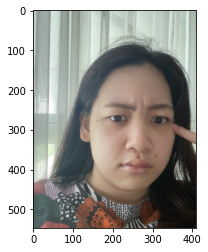

In [ ]:
# Please upload the image into the folder before runnning the code!
# FORMAT: img = cv2.imread("PASTE FILE PATH HERE") 
img = cv2.imread("/content/prim.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Making predictions with DeepFace

In [ ]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 20.9MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:25<00:00, 21.3MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:23<00:00, 23.0MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:24<00:00, 22.1MB/s]
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


In [ ]:
predictions # show predictions from DeepFace

{'age': 29,
 'dominant_emotion': 'sad',
 'dominant_race': 'asian',
 'emotion': {'angry': 2.3742152377963066,
  'disgust': 0.00049851100811793,
  'fear': 9.56040769815445,
  'happy': 0.00958511300268583,
  'neutral': 4.767230153083801,
  'sad': 83.2840621471405,
  'surprise': 0.004003168214694597},
 'gender': 'Man',
 'race': {'asian': 67.53684282302856,
  'black': 1.1712846346199512,
  'indian': 7.374473661184311,
  'latino hispanic': 22.134123742580414,
  'middle eastern': 0.21411143243312836,
  'white': 1.5691651031374931},
 'region': {'h': 270, 'w': 270, 'x': 115, 'y': 174}}

In [ ]:
predictions['dominant_emotion'] # choose to display only emotions

'sad'

# Making Predictions with pre-trained model

In [ ]:
# import Haar Cascade to detect faces in the image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad', 'Surprise', 'Neutral']
classifier =load_model('/CNN.48-0.66.hdf5')
img = cv2.imread("/sample_pic/mook.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
  roi_gray = gray[y:y+h,x:x+w]
  roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

  if np.sum([roi_gray])!=0:
      roi = roi_gray.astype('float')/255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi,axis=0)

      prediction = classifier.predict(roi)[0]
      label=emotion_labels[prediction.argmax()]
      if y > 50:
        label_position = (x,y-10)
      else:
        label_position = (x,y+h+50)
      cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
  else:
      cv2.putText(img,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),2)
  
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.imwrite('/tmp/temp.png', img)

True

# Face Detection

In [ ]:
# import Haar Cascade to detect faces in the image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

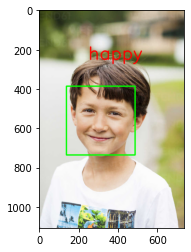

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, predictions['dominant_emotion'],
            (250,250), font, 3, (0,0,255), 5, cv2.LINE_4);
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Using Webcam

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# import Haar Cascade to detect faces in the image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = faceCascade.detectMultiScale(gray)
    
    if len(faces) > 0:
      result = DeepFace.analyze(img,actions=['emotion'],enforce_detection=False)
      # get face bounding box for overlay
      for (x,y,w,h) in faces:
        bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(bbox_array,result['dominant_emotion'],(x,y-10),
                  font, 3, (0,0,255), 2);

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


Ignore the next bit

In [ ]:
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cap = cv2.VideoCapture(1)
# # check if the webcam is opened correctly
# if not cap.isOpened():
#   cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#   raise IOError("Cannot open webcam")

# while True:
#   ret,frame = cap.read()
#   result = DeepFace.analyze(frame,actions=['emotion'])

#   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#   faces = faceCascade.detectMultiScale(gray,1.1,4)

#   for (x,y,w,h) in faces:
#     cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)

#   font = cv2.FONT_HERSHEY_SIMPLEX
#   cv2.putText(frame, result['dominant_emotion'],
#             (50,50), font, 3, (0,0,255), 2, cv2.LINE_4)
#   cv2.imshow('Demo Video', frame)

#   if cv2.waitKey(2) & 0xFF == ord('q'):
#     break
  
# cap.release()
# cap.destroyAllWindows()

# PART 1: Emotion Detection

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
classifier =load_model('/content/CNN.48-0.66.hdf5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad', 'Surprise', 'Neutral']

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Emotion Detector'
# initialze bounding box to empty
bbox = ''
count = 0 

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    labels = []
    # grayscale the image for classifier
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# PART 2: Face Landmarks

In [ ]:
import cv2
!pip install mediapipe
import mediapipe as mp
print("Modules imported!")

     |████████████████████████████████| 32.2MB 86kB/s 
Modules imported!


In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# For static images:
IMAGE_FILES = ["/sample_pic/prim.jpg"]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=5,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue # skip the file if no face is detected
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      # print('face_landmarks:', face_landmarks)
      # for id, lm in enumerate(face_landmarks.landmark):
      #   iw, ih, it = image.shape
      #   print(id, lm.x*iw, lm.y*ih)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

In [ ]:
# Taken from Google's MediaPipe
FACE_CONNECTIONS = frozenset([
    # Lips.
    (61, 146),
    (146, 91),
    (91, 181),
    (181, 84),
    (84, 17),
    (17, 314),
    (314, 405),
    (405, 321),
    (321, 375),
    (375, 291),
    (61, 185),
    (185, 40),
    (40, 39),
    (39, 37),
    (37, 0),
    (0, 267),
    (267, 269),
    (269, 270),
    (270, 409),
    (409, 291),
    (78, 95),
    (95, 88),
    (88, 178),
    (178, 87),
    (87, 14),
    (14, 317),
    (317, 402),
    (402, 318),
    (318, 324),
    (324, 308),
    (78, 191),
    (191, 80),
    (80, 81),
    (81, 82),
    (82, 13),
    (13, 312),
    (312, 311),
    (311, 310),
    (310, 415),
    (415, 308),
    # Left eye.
    (263, 249),
    (249, 390),
    (390, 373),
    (373, 374),
    (374, 380),
    (380, 381),
    (381, 382),
    (382, 362),
    (263, 466),
    (466, 388),
    (388, 387),
    (387, 386),
    (386, 385),
    (385, 384),
    (384, 398),
    (398, 362),
    # Left eyebrow.
    (276, 283),
    (283, 282),
    (282, 295),
    (295, 285),
    (300, 293),
    (293, 334),
    (334, 296),
    (296, 336),
    # Right eye.
    (33, 7),
    (7, 163),
    (163, 144),
    (144, 145),
    (145, 153),
    (153, 154),
    (154, 155),
    (155, 133),
    (33, 246),
    (246, 161),
    (161, 160),
    (160, 159),
    (159, 158),
    (158, 157),
    (157, 173),
    (173, 133),
    # Right eyebrow.
    (46, 53),
    (53, 52),
    (52, 65),
    (65, 55),
    (70, 63),
    (63, 105),
    (105, 66),
    (66, 107),
    # Face oval.
    (10, 338),
    (338, 297),
    (297, 332),
    (332, 284),
    (284, 251),
    (251, 389),
    (389, 356),
    (356, 454),
    (454, 323),
    (323, 361),
    (361, 288),
    (288, 397),
    (397, 365),
    (365, 379),
    (379, 378),
    (378, 400),
    (400, 377),
    (377, 152),
    (152, 148),
    (148, 176),
    (176, 149),
    (149, 150),
    (150, 136),
    (136, 172),
    (172, 58),
    (58, 132),
    (132, 93),
    (93, 234),
    (234, 127),
    (127, 162),
    (162, 21),
    (21, 54),
    (54, 103),
    (103, 67),
    (67, 109),
    (109, 10)
])

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
connections = FACE_CONNECTIONS
drawing_spec = mp_drawing.DrawingSpec(thickness=1,circle_radius=1)
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, 
                                  min_tracking_confidence=0.5)

# import Haar Cascade to detect faces in the image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    image = js_to_image(js_reply["img"])

    # convert color to RGB
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Dictionary
    idx_to_coordinates = {}
    image_width, image_height, _ = image.shape

    if results.multi_face_landmarks:
      # print("Face found")
      for face_landmarks in results.multi_face_landmarks:

        for idx, lm in enumerate(face_landmarks.landmark):
          x = min(int(lm.x*image_width), image_width-1)
          y = min(int(lm.y*image_height), image_height-1)
          idx_to_coordinates[idx] = (x,y)

        if connections:
          num_landmarks = len(face_landmarks.landmark)
          # Draw the connections if the start and end landmarks are both visible
          for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if start_idx in idx_to_coordinates and end_idx in idx_to_coordinates:
              bbox_array = cv2.line(bbox_array, idx_to_coordinates[start_idx], 
                                    idx_to_coordinates[end_idx],(255,0,0),1)
              
      # Draw landmark points
      for lx, ly in idx_to_coordinates.values():
        bbox_array = cv2.circle(bbox_array,(lx,ly),1,(0,255,0),1)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# PART 3: Face Recognition

In [ ]:
import cv2
import numpy as np
!pip install face_recognition
import face_recognition
import os
print("Modules imported")

     |████████████████████████████████| 100.2MB 102kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=63c0f757280cd1563d4cd460927704ba503f8540221545a6646ffe39cf3edacb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Modules imported


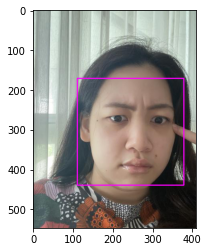

In [ ]:
img = face_recognition.load_image_file('/content/prim.jpg')
faceLoc = face_recognition.face_locations(img)[0]
encode = face_recognition.face_encodings(img)[0]
cv2.rectangle(img, (faceLoc[3],faceLoc[0]), (faceLoc[1], faceLoc[2]), (255,0,255),2)
plt.imshow(img)

In [ ]:
# preprocess the picture directory
path = '/sample_pic'
images = [] # list of all images
names = [] # list of all names
nameList = os.listdir(path) # read the file name
for name in nameList:
  curImg = cv2.imread(f'{path}/{name}')
  images.append(curImg)
  names.append(os.path.splitext(name)[0])

# encode all images into a list
# input: list of OpenCV images
# output: list of face encodings 
def findEncodings(images):
  encodeList = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList

encodeList = findEncodings(images)

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    image = js_to_image(js_reply["img"])

    # convert color to RGB
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # detect face location and face encoding in each frame
    facesCurFrame = face_recognition.face_locations(image)
    encodesCurFrame = face_recognition.face_encodings(image)

    # find the match with the given folder
    for faceLoc, faceEncode in zip(facesCurFrame, encodesCurFrame):
      match = face_recognition.compare_faces(encodeList, faceEncode)
      faceDist = face_recognition.face_distance(encodeList, faceEncode)
      matchIdx = np.argmin(faceDist)
      if match[matchIdx]:
        name = names[matchIdx].upper()
        y1, x2, y2, x1 = faceLoc
        bbox_array = cv2.rectangle(bbox_array, (x1,y1),(x2,y2),(0,255,0),2)
        bbox_array = cv2.putText(bbox_array, name, (x1, y2+30), 
                                 cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
  
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# PART 4: Combining it all together

Import needed modules

In [ ]:
# import needed modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Optional: DeepFace (emotional detection)
# !pip install deepface
# from deepface import DeepFace

# Using Webcam
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# Emotion Detection
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image

# Face Landmarks
!pip install mediapipe
import mediapipe as mp

# Face Recognition
!pip install face_recognition
import face_recognition
import os

print("Modules imported!")

     |████████████████████████████████| 100.1 MB 6.2 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=860899064a0e8f9659cf77e733db155b89ea45839f0f2112de0a1875f1011b40
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Modules imported!


Create needed functions for convenience

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# encode all images into a list
# input: list of OpenCV images
# output: list of face encodings 
def findEncodings(images):
  encodeList = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList

Preprocessing

In [ ]:
# Taken from Google's MediaPipe
FACE_CONNECTIONS = frozenset([
    # Lips.
    (61, 146),
    (146, 91),
    (91, 181),
    (181, 84),
    (84, 17),
    (17, 314),
    (314, 405),
    (405, 321),
    (321, 375),
    (375, 291),
    (61, 185),
    (185, 40),
    (40, 39),
    (39, 37),
    (37, 0),
    (0, 267),
    (267, 269),
    (269, 270),
    (270, 409),
    (409, 291),
    (78, 95),
    (95, 88),
    (88, 178),
    (178, 87),
    (87, 14),
    (14, 317),
    (317, 402),
    (402, 318),
    (318, 324),
    (324, 308),
    (78, 191),
    (191, 80),
    (80, 81),
    (81, 82),
    (82, 13),
    (13, 312),
    (312, 311),
    (311, 310),
    (310, 415),
    (415, 308),
    # Left eye.
    (263, 249),
    (249, 390),
    (390, 373),
    (373, 374),
    (374, 380),
    (380, 381),
    (381, 382),
    (382, 362),
    (263, 466),
    (466, 388),
    (388, 387),
    (387, 386),
    (386, 385),
    (385, 384),
    (384, 398),
    (398, 362),
    # Left eyebrow.
    (276, 283),
    (283, 282),
    (282, 295),
    (295, 285),
    (300, 293),
    (293, 334),
    (334, 296),
    (296, 336),
    # Right eye.
    (33, 7),
    (7, 163),
    (163, 144),
    (144, 145),
    (145, 153),
    (153, 154),
    (154, 155),
    (155, 133),
    (33, 246),
    (246, 161),
    (161, 160),
    (160, 159),
    (159, 158),
    (158, 157),
    (157, 173),
    (173, 133),
    # Right eyebrow.
    (46, 53),
    (53, 52),
    (52, 65),
    (65, 55),
    (70, 63),
    (63, 105),
    (105, 66),
    (66, 107),
    # Face oval.
    (10, 338),
    (338, 297),
    (297, 332),
    (332, 284),
    (284, 251),
    (251, 389),
    (389, 356),
    (356, 454),
    (454, 323),
    (323, 361),
    (361, 288),
    (288, 397),
    (397, 365),
    (365, 379),
    (379, 378),
    (378, 400),
    (400, 377),
    (377, 152),
    (152, 148),
    (148, 176),
    (176, 149),
    (149, 150),
    (150, 136),
    (136, 172),
    (172, 58),
    (58, 132),
    (132, 93),
    (93, 234),
    (234, 127),
    (127, 162),
    (162, 21),
    (21, 54),
    (54, 103),
    (103, 67),
    (67, 109),
    (109, 10)
])

In [ ]:
# initiate the needed variables
font = cv2.FONT_HERSHEY_SIMPLEX
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
connections = FACE_CONNECTIONS
drawing_spec = mp_drawing.DrawingSpec(thickness=1,circle_radius=1)
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, 
                                  min_tracking_confidence=0.5)
classifier =load_model('/CNN.48-0.66.hdf5')
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad', 'Surprise', 'Neutral']

# preprocess the picture directory
path = '/sample_pic'
images = [] # list of all images
names = [] # list of all names
nameList = os.listdir(path) # read the file name
for name in nameList:
  curImg = cv2.imread(f'{path}/{name}')
  images.append(curImg)
  names.append(os.path.splitext(name)[0])

encodeList = findEncodings(images)

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    image = js_to_image(js_reply["img"])

    # convert color to RGB
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
       
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # detect face location and face encoding in each frame
    facesCurFrame = face_recognition.face_locations(image)
    encodesCurFrame = face_recognition.face_encodings(image)

    # find the match with the given folder
    for faceLoc, faceEncode in zip(facesCurFrame, encodesCurFrame):
      match = face_recognition.compare_faces(encodeList, faceEncode)
      faceDist = face_recognition.face_distance(encodeList, faceEncode)
      matchIdx = np.argmin(faceDist)
      if match[matchIdx]:
        name = names[matchIdx].upper()
        y1, x2, y2, x1 = faceLoc
        bbox_array = cv2.rectangle(bbox_array, (x1,y1),(x2,y2),(0,255,0),2)
        bbox_array = cv2.putText(bbox_array, name, (x1, y2+30), 
                                 cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
        
        roi_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)[y1:y2,x1:x2]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
          roi = roi_gray.astype('float')/255.0
          roi = img_to_array(roi)
          roi = np.expand_dims(roi,axis=0)

          prediction = classifier.predict(roi)[0]
          label=emotion_labels[prediction.argmax()]
          label_position = (x1,y1-10)
          cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
          cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
    # # To improve performance, optionally mark the image as not writeable to
    # # pass by reference.
    # image.flags.writeable = False
    # results = face_mesh.process(image)

    # # Draw the face mesh annotations on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # # Dictionary
    # idx_to_coordinates = {}
    # image_width, image_height, _ = image.shape

    # if results.multi_face_landmarks:
    #   # print("Face found")
    #   for face_landmarks in results.multi_face_landmarks:

    #     for idx, lm in enumerate(face_landmarks.landmark):
    #       x = min(int(lm.x*image_width), image_width-1)
    #       y = min(int(lm.y*image_height), image_height-1)
    #       idx_to_coordinates[idx] = (x,y)

    #     if connections:
    #       num_landmarks = len(face_landmarks.landmark)
    #       # Draw the connections if the start and end landmarks are both visible
    #       for connection in connections:
    #         start_idx = connection[0]
    #         end_idx = connection[1]
    #         if start_idx in idx_to_coordinates and end_idx in idx_to_coordinates:
    #           bbox_array = cv2.line(bbox_array, idx_to_coordinates[start_idx], 
    #                                 idx_to_coordinates[end_idx],(255,0,0),1)
              
    #   # Draw landmark points
    #   for lx, ly in idx_to_coordinates.values():
    #     bbox_array = cv2.circle(bbox_array,(lx,ly),1,(0,255,0),1)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>